# CS112: Assignment 1
##  R Competency and The Drivetrain Approach to Decision Making
## Data Processing and Data Clean up

In [1]:
### Multilateral Development Institution Data
foo <- read.csv("https://tinyurl.com/yb4phxx8") # read in the data

In [2]:
# column names
names(foo)

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

In [3]:
# dimensions of the data set
dim(foo)

[1] 9016   25

In [4]:
# quick look at the data structure
head (foo)

Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
5001,Financially Completed,,R,RETA,REG,,,"Agriculture, natural resources and rural development",0,...,1987-12-31,,1987-12-31,NA,2,0.155,NA,,,
1,Financially Completed,,,ADTA,INO,,,"Agriculture, natural resources and rural development",0,...,1968-07-31,,1968-07-31,NA,2,0.080,NA,,,
2,Financially Completed,,,ADTA,KOR,,,"Agriculture, natural resources and rural development",0,...,1969-10-31,,1969-10-31,NA,2,0.067,NA,,,
3,Financially Completed,,,ADTA,PHI,,,"Agriculture, natural resources and rural development",0,...,1970-01-31,,1970-01-31,NA,2,0.105,NA,,,
4,Financially Completed,,,ADTA,VIE,,,Finance,0,...,1972-08-31,,1972-08-31,NA,2,0.115,NA,,,
5,Financially Completed,,,PPTA,PHI,,,Transport,0,...,1970-03-31,,1970-03-31,NA,2,0.325,NA,,,


In [5]:
#columns representing calendar dates
date.columns <- c(11 , 12 , 14 , 15 , 16 , 17 , 18 , 25)

In [6]:
for( i in date.columns ) # looping through the " date.columns "
{
# Finding missing values
which_values_are_missing <- which (as.character(foo[,i])=="")
# Replacing them by NAs
foo [which_values_are_missing , i] <- NA
# Turning values into dates
foo [,i]<-as.Date(as.character(foo[,i]))
}
 # Try this yourself
foo[3,12]
# [1] "1968 -03 -13"
foo[4 ,12]
# [1] "1968 -07 -03"
foo[3 ,12] - foo [4 ,12]


# Removing NAs for a given column
which.have.NAs <- which(is.na(foo$ Rating ) )
new_foo <- foo [ - which.have.NAs , ]

[1] "1968-03-13"

[1] "1968-07-03"

Time difference of -112 days

## Assignment Coding and Tasks

In [7]:
# filter to exclude NAs in circulation date
which.have.NAs <- which(is.na(foo$CirculationDate))
circulation_removal <- new_foo[-which.have.NAs, ]

In [8]:
# filter to include circulation dates after 2009
which.after_2009 <- which(circulation_removal$CirculationDate <= as.Date("2009-01-01"))
data <- circulation_removal[-which.after_2009, ]
#summary(data)

Summary(data) is used to check the min value of the current dataset which is 2009-02-25. Hence, our current dataset only includes projects with non-missing circulation dates after 2009-01-01

###  Task 1
#### When projects are approved, they are approved for a certain period (until the time of “original completion date”). While projects are active, this “original” completion date is often extended, and then there is a “revised” completion date. You have been told that project duration at approval is generally about two years (24 months). In other words, (purportedly) when projects are approved, the difference between the original project completion date and the approval date is (supposedly) approximately 24 months.

#### (A) Is this claim true? Explain.


In [9]:
noNA_foo <- new_foo[!is.na(new_foo$CirculationDate), ]
df <- noNA_foo[which(noNA_foo$CirculationDate >= as.Date("2009-01-01")), ]

# Check:
summary(df$CirculationDate)

# Disregarding projects have no original completion dates.


mask <- which(is.na(df$OriginalCompletionDate))
df_withDates <- df[-mask,]
expected_duration <- mean(df_withDates$OriginalCompletionDate) - mean(df_withDates$ApprovalDate) 
expected_duration
time_in_years <- expected_duration/365
time_in_years

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2009-01-14" "2011-07-21" "2014-02-03" "2013-12-02" "2016-06-17" "2018-06-29"

Time difference of 650.9313 days

Time difference of 1.783374 days

#### (B) Has the length of project delay, measured as the difference between “OriginalCompletionDate” and “RevisedCompletionDate”, changed over time (consider projects circulated earlier and circulated later)? You will need to make a choice of how to deal with missing information, which you should explicitly discuss. Be sure to also discuss 3 mean delays, median delays, and the interquartile range of delays (using the “quantile” function). Approximate suggested length: 3-5 sentences.

[1] 0

CirculationYear,mean.delay,median.delay,IQR.delay
2009,657.7644 days,549.0 days,610.00 days
2010,634.0000 days,547.0 days,511.25 days
2011,584.7664 days,426.0 days,610.00 days
2012,538.2390 days,487.0 days,409.50 days
2013,503.5893 days,396.0 days,493.00 days
2014,520.1750 days,457.0 days,396.25 days
2015,626.9821 days,442.0 days,677.25 days
2016,529.3702 days,366.0 days,518.00 days
2017,540.1632 days,456.0 days,545.75 days
2018,566.1905 days,365.5 days,418.50 days


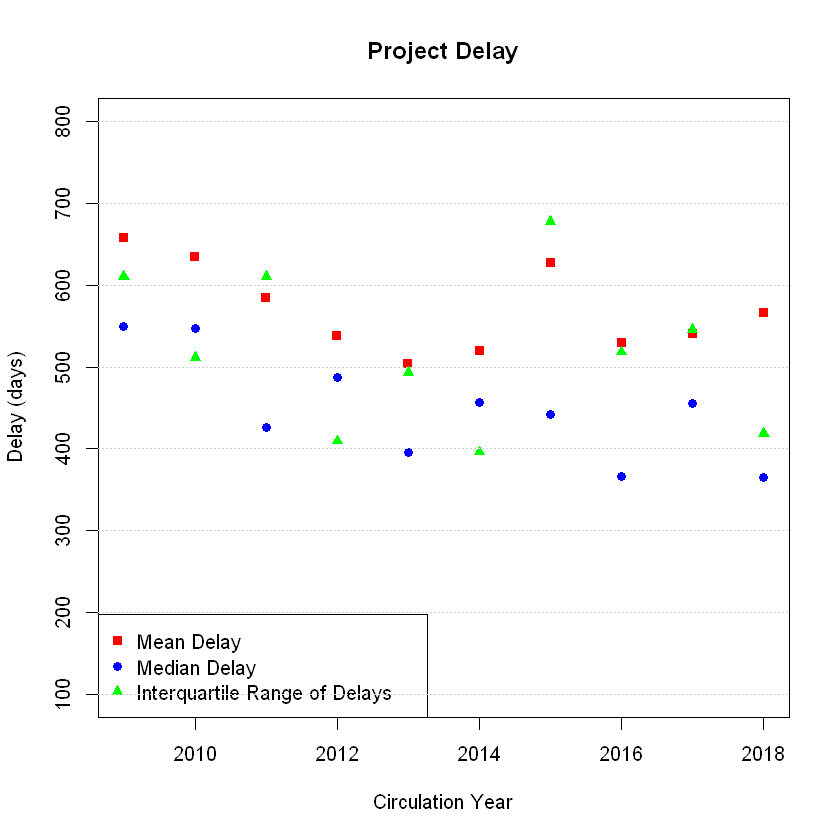

In [19]:
# Createing a circulation year column
df_withDates$CirculationYear <- format(df_withDates$CirculationDate, "%Y")

# Checking if there are rows with NAs in the Revised Completion Date column?
sum(is.na(df_withDates$RevisedCompletionDate))

# And an delay column
df_withDates$Delay <- df_withDates$RevisedCompletionDate - df_withDates$OriginalCompletionDate 

library(dplyr)  
delayByYear <- df_withDates %>%  # %>% means "pass what is to the left to the function that follows"
  group_by(CirculationYear) %>%    
  summarise(mean.delay = mean(Delay), 
            median.delay = median(Delay),
            IQR.delay = quantile(Delay, 0.75) - quantile(Delay, 0.25))
delayByYear

plot(delayByYear$CirculationYear, delayByYear$mean.delay, 
     pch=15, col="red", ylim=c(100, 800), 
     xlab="Circulation Year", ylab="Delay (days)", main="Project Delay")
points(delayByYear$CirculationYear, delayByYear$median.delay, pch=16, col="blue")
points(delayByYear$CirculationYear, delayByYear$IQR.delay, pch=17, col="green")
legend("bottomleft", pch=c(15,16,17), 
       col=c("red","blue","green"), 
       legend=c("Mean Delay", "Median Delay", "Interquartile Range of Delays"))
grid(nx=NA, ny=NULL)

#### (C) How does the original planned project duration differ from actual duration (if the actual duration is measured as the duration between “ApprovalDate” and “RevisedComple- tionDate”)? Once again, use means, medians, and interquartile ranges to explain your results. Approximate suggested length: 3-5 sentences.

Time difference of 1220.019 days

Time difference of 1120.5 days

Time differences in days
     0%     25%     50%     75%    100% 
  56.00  838.25 1120.50 1482.75 4395.00 

[1] 644.5

Time difference of 650.9313 days

Time difference of 599.5 days

Time differences in days
     0%     25%     50%     75%    100% 
  18.00  406.25  599.50  792.00 3369.00 

[1] 385.75

Time differences in days
[1]   18 3369

CirculationYear,mean.duration,median.duration,IQR.duration
2009,1276.963 days,1152.0 days,636.50 days
2010,1297.779 days,1150.0 days,620.50 days
2011,1188.139 days,1115.0 days,652.00 days
2012,1089.484 days,1049.0 days,537.00 days
2013,1147.821 days,1099.0 days,687.50 days
2014,1167.700 days,1136.5 days,586.25 days
2015,1249.220 days,1153.0 days,763.25 days
2016,1227.009 days,1122.0 days,644.00 days
2017,1261.437 days,1146.0 days,654.25 days
2018,1319.476 days,1123.5 days,639.00 days


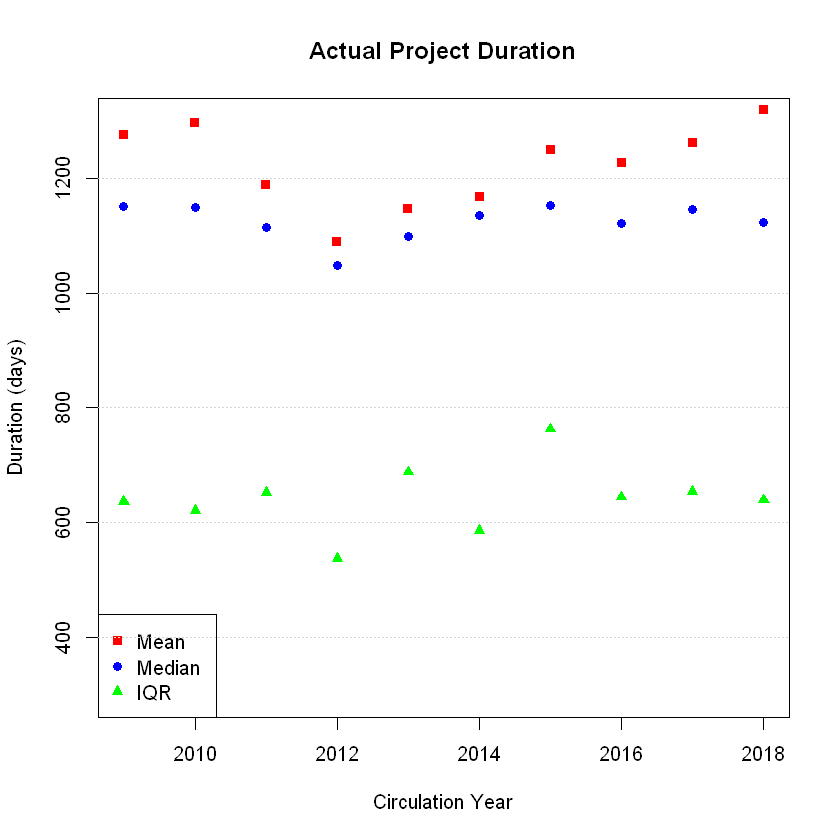

In [20]:
# Creating an actual duration column
df_withDates$ActualDuration <- df_withDates$RevisedCompletionDate - df_withDates$ApprovalDate

# Actual duration statistics
mean(df_withDates$ActualDuration) 
median(df_withDates$ActualDuration)
quantile(df_withDates$ActualDuration)
IQR(df_withDates$ActualDuration) 

df_withDates$ExpectedDuration <- df_withDates$OriginalCompletionDate - df_withDates$ApprovalDate

mean(df_withDates$ExpectedDuration)
median(df_withDates$ExpectedDuration) 
quantile(df_withDates$ExpectedDuration) 
IQR(df_withDates$ExpectedDuration)
range(df_withDates$ExpectedDuration)

ActualDurationByYear <- df_withDates %>%  
  group_by(CirculationYear) %>%    
  summarise(mean.duration = mean(ActualDuration), 
            median.duration = median(ActualDuration),
            IQR.duration = quantile(ActualDuration, 0.75) - quantile(ActualDuration, 0.25))
ActualDurationByYear

plot(ActualDurationByYear$CirculationYear, 
     ActualDurationByYear$mean.duration, pch=15, col="red", ylim=c(300, 1300),
     xlab="Circulation Year", ylab="Duration (days)", main="Actual Project Duration")
points(ActualDurationByYear$CirculationYear, 
       ActualDurationByYear$median.duration, pch=16, col="blue")
points(ActualDurationByYear$CirculationYear, 
       ActualDurationByYear$IQR.duration, pch=17, col="green")
legend("bottomleft", pch=c(15,16,17), 
       col=c("red","blue","green"), 
       legend=c("Mean", "Median", "IQR"))
grid(nx=NA, ny=NULL)

### Task 2
#### What % of projects completed between 2010 and now were rated 0? What % over the same time period were rated 1? What % were rated 2? What % were rated 3? Answer these questions using a table or a figure. Provide a title and an explanatory sentence or two that provides the numerical % results rounded to the nearest percentage point.


  0   1   2   3 
 10  72 425  88 


    0     1     2     3 
 2.27 13.48 69.55 14.70 

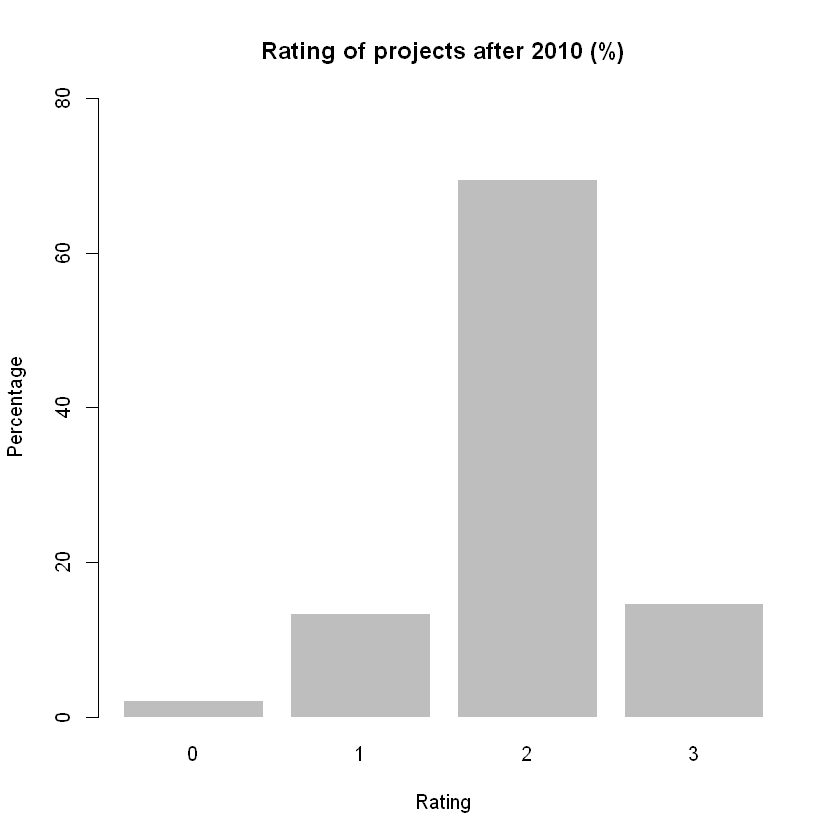

In [28]:
# Making sure my data is after 2010
which.after_2010 <- which(data$RevisedCompletionDate <= as.Date("2010-01-01"))
after_2010 <- data[-which.after_2010, ]

# Table containing frequency of rating
table(after_2010$Rating)

# Converting table above to percentage
pr_rating <- prop.table(table((data$Rating)))

# Rounding percentages
pc <- round(pr_rating*100, 2)
pc
# Barplot representing the data above
barplot(pc, 
        border = 0, 
        main="Rating of projects after 2010 (%)",
        ylim=c(0, 80),
        xlab = 'Rating', 
        ylab = 'Percentage', )

### Task 3
#### Repeat problem 2, but this time limit your analysis purely to policy and advisory technical assistance (”PATA”) projects.


  0   1   2   3 
  1  14 105  29 


    0     1     2     3 
 0.67  9.40 70.47 19.46 

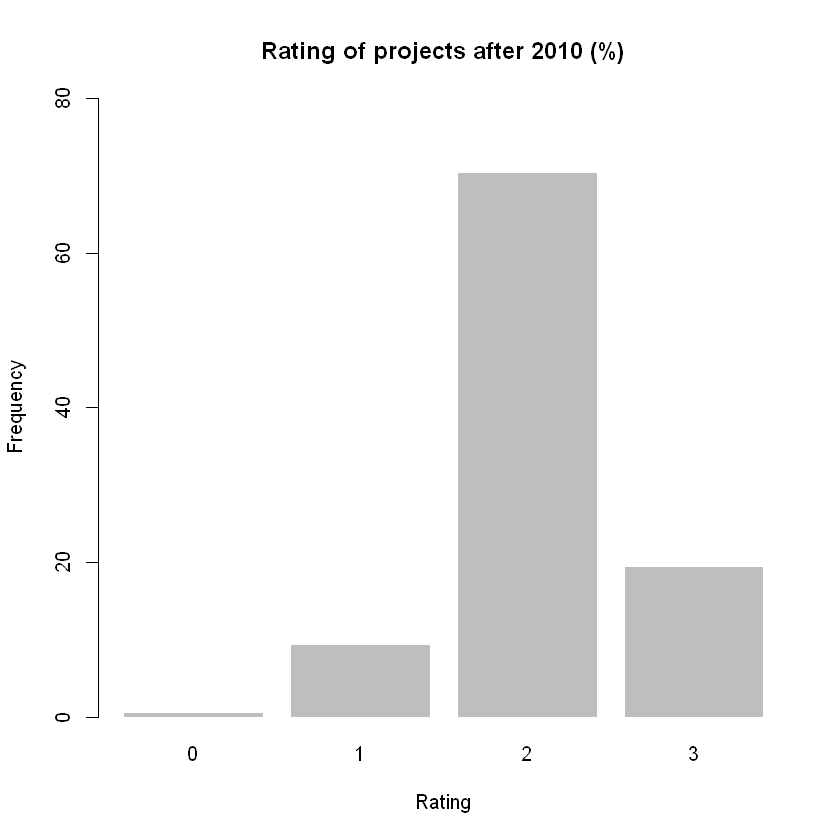

In [26]:
# Creating ppta dataset
ex_pata <- after_2010[which(as.character(after_2010$Type) == "PATA"), ]

# Table with frequency of ratings in ppta dataset
table(ex_pata$Rating)

# Converting table to percentages
percent_pata <- prop.table(table((ex_pata$Rating)))

# Rounding percentages
pata <- round(percent_pata*100, 2)

# Showing percentages
pata

# Barplot representing the data above
barplot(pata, 
        border = 0, 
        ylim=c(0, 80),
        main="Rating of projects after 2010 (%)",
        xlab = 'Rating', 
        ylab = 'Frequency', )

### Task 4
#### Identify the top 10% of projects by “Revised.Amount” and the bottom 10% of projects by “RevisedAmount” (“RevisedAmount” shows the final project budget). Compare the ratings of these projects. Can you draw a causal conclusion about the effect of budget size on ratings? Why or why not? Hint: Compare the characteristics of the two project groupings, e.g., “Dept,” “Division,” “Cluster,” “Country.” Approximate suggested length: 3-5 sentences.


 1  2  3 
 3 33  5 


         1          2          3 
0.07317073 0.80487805 0.12195122 


 1  2  3 
 8 47 11 


        1         2         3 
0.1212121 0.7121212 0.1666667 

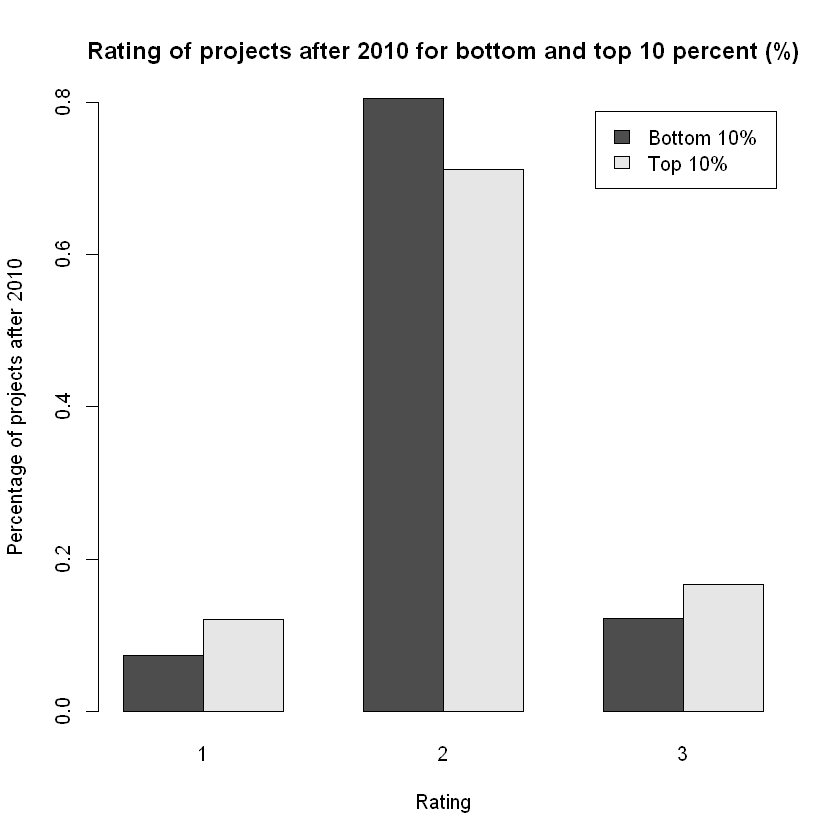

In [15]:
# Creating bottom 10% of projects by revised amount
rs_low <- data[which(data$RevisedAmount < quantile(data$RevisedAmount, 0.10, na.rm = TRUE)),]

# Creating top 10% of projects by revised amount
rs_high <- data[which(data$RevisedAmount > quantile(data$RevisedAmount, 0.90, na.rm = TRUE)),]

# Table of ratings for bottom 10%
table(rs_low$Rating)

# Bottom 10 % table as a fraction of total entries for bottom 10 %
rs_low_tab <- prop.table(table((rs_low$Rating)))
rs_low_tab

# Table for top 10 %
table(rs_high$Rating)

# Top 10 % table as a fraction of total entries for top 10 %
rs_high_tab <- prop.table(table((rs_high$Rating)))
rs_high_tab

# Barplot representing rating of projects dependent on the revised amount
test <- rbind(rs_low_tab,rs_high_tab)
barplot(test,
        beside=T, 
        main="Rating of projects after 2010 for bottom and top 10 percent (%)",
        legend = c('Bottom 10%', "Top 10%"),
        xlab = 'Rating',
        ylab = 'Percentage of projects after 2010',)

In [16]:
# Summary to look at other charachteristics of bottom 10%
summary(rs_low)
#rs_low

     Number                       Status      Cluster       Prefix  
 Min.   :4886   Active               : 0          :39   RS     :20  
 1st Qu.:7235   Cancelled            : 0   C003   : 1   S      :16  
 Median :7530   Financially Completed:41   C006   : 1          : 3  
 Mean   :7439                              14     : 0   Cs     : 1  
 3rd Qu.:8120                              15     : 0   RCsS   : 1  
 Max.   :9063                              16     : 0   CsS    : 0  
                                           (Other): 0   (Other): 0  
      Type       Country        Dept       Division 
 CDTA   :14   REG    :21   SARD   :9   PATE    : 4  
 PATA   :10   NEP    : 3   ERCD   :5   ERDI    : 3  
 RDTA   : 6   INO    : 2   PARD   :5   CWOD    : 2  
 RETA   : 5   MON    : 2   SDCC   :5   SAEN    : 2  
 ADTA   : 4   SRI    : 2   SERD   :5   SAPF    : 2  
 PPTA   : 2   BAN    : 1   CWRD   :3   SDSC-TRA: 2  
 (Other): 0   (Other):10   (Other):9   (Other) :26  
                        

In [17]:
# Summary to look at other charachteristics of top 10%
summary(rs_high)

     Number                       Status      Cluster       Prefix  
 Min.   :4573   Active               : 0          :65   R      :37  
 1st Qu.:6431   Cancelled            : 0   C003   : 1          :28  
 Median :7230   Financially Completed:66   14     : 0   Cs     : 1  
 Mean   :6979                              15     : 0   CsS    : 0  
 3rd Qu.:7875                              16     : 0   RCs    : 0  
 Max.   :8657                              17     : 0   RCsS   : 0  
                                           (Other): 0   (Other): 0  
      Type       Country        Dept       Division 
 CDTA   :24   REG    :37   SDCC   :18   SDSC   : 8  
 RETA   :20   IND    : 7   PARD   :11   PATE   : 6  
 ADTA   :12   AFG    : 3   SERD   :11   SAUW   : 3  
 PATA   : 6   MYA    : 3   CWRD   : 9   SDES   : 3  
 PPTA   : 2   CAM    : 2   SARD   : 9   AFRM   : 2  
 RDTA   : 2   MON    : 2   EARD   : 6   CWEN   : 2  
 (Other): 0   (Other):12   (Other): 2   (Other):42  
                        